### Description
This notebook examines Open Table diner information.

From Open Table: This data shows year-over-year seated diners at restaurants on the OpenTable network across all channels: online reservations, phone reservations, and walk-ins. For year-over-year comparisons by day, we compare to the same day of the week from the same week in the previous year. For example, we’d compare Tuesday of week 11 in 2020 to Tuesday of week 11 in 2019. Only states or cities with 50+ restaurants in the sample are included. All such restaurants on the OpenTable network in either period are included.

Data Source: https://www.opentable.com/state-of-industry
        

In [11]:
import numpy as np
import pandas as pd
import plotly.express as px # Plotly express, for cloropleth maps
import matplotlib.pyplot as plt

from urllib.request import urlopen
import json

### Load state-level data

In [8]:
excel_file_name = r'C:\Users\Donald\Dropbox\Public\MyData\Matlab Code\Coronavirus\open_table.xlsx'
data_sheet_name = 'rest_by_state'
rest = pd.read_excel(excel_file_name, sheet_name=data_sheet_name)
rest.head()

,Name,State,Diner_Index
0,Alabama,AL,43.83
1,Arizona,AZ,44.27
2,California,CA,7.82
3,Colorado,CO,5.76
4,Connecticut,CT,35.58


### Plot state-level data

In [9]:
col_to_plot = 'Diner_Index'
txt_for_title = f'Open Table Diner Index<br>Data Source: https://www.opentable.com/state-of-industry'


fig = px.choropleth(rest,                 # Input Pandas DataFrame
                    locations = "State",  # DataFrame column with locations
                    color = col_to_plot,  # DataFrame column with color values
                    hover_name = "Name",  # DataFrame column hover info
                    color_continuous_scale = "matter", # color scale
                    labels = {col_to_plot:'Diner Index'}, # 
                    locationmode = 'USA-states') # Set to plot as US States

# The default view is the entire globe, but we only want to show the US
# change the scope.
fig.update_layout(
    title_text = txt_for_title, # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe    
)

fig.show()  # Output the plot to the screen

### Load state-level data

In [10]:
excel_file_name = r'C:\Users\Donald\Dropbox\Public\MyData\Matlab Code\Coronavirus\open_table.xlsx'
data_sheet_name = 'rest_by_state_daily'
rest_daily = pd.read_excel(excel_file_name, sheet_name=data_sheet_name)
rest_daily.head()

,Date,Alabama,Arizona,California,Colorado,Connecticut,District of Columbia,Florida,Georgia,Hawaii,...,Rhode Island,South Carolina,Tennessee,Texas,Utah,Virginia,Washington,Wisconsin,New York.1,Washington.1
0,18-Feb-2020,86.0,100.0,98.0,101.0,108.0,95.0,100.0,100.0,100.0,...,108.0,108.0,101.0,100.0,100.0,106.0,109.0,103.0,101.0,95.0
1,19-Feb-2020,107.0,101.0,102.0,92.0,126.0,155.0,97.0,104.0,102.0,...,100.0,98.0,108.0,94.0,103.0,158.0,108.0,121.0,111.0,157.0
2,20-Feb-2020,101.0,108.0,105.0,96.0,101.0,108.0,96.0,94.0,104.0,...,107.0,89.0,91.0,100.0,102.0,99.0,106.0,99.0,103.0,109.0
3,21-Feb-2020,98.0,104.0,100.0,107.0,97.0,100.0,95.0,95.0,105.0,...,85.0,100.0,103.0,102.0,104.0,97.0,103.0,97.0,100.0,100.0
4,22-Feb-2020,108.0,97.0,98.0,101.0,94.0,108.0,102.0,98.0,104.0,...,94.0,110.0,107.0,101.0,105.0,106.0,102.0,114.0,103.0,109.0


In [ ]:
### Plot state

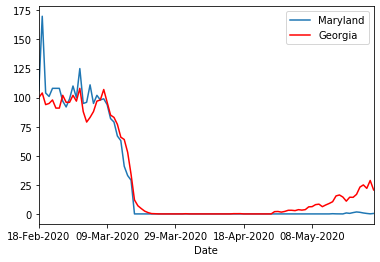

In [13]:
state_1 = 'Maryland'
state_2 = 'Georgia'


ax = plt.gca() # gca stands for 'get current axis'

rest_daily.plot(kind='line',x='Date',y=state_1,ax=ax)
rest_daily.plot(kind='line',x='Date',y=state_2, color='red', ax=ax)

plt.show()